In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
order = [['Moonshot'],['Mixtral'],['gpt35'],['Llama3'],['gpt-4omini']]
order = [['gpt35', 'Mixtral','Moonshot',], ['Llama3','gpt-4omini']]
from mgtbench.loading import load_incremental_topic, load_incremental

data = load_incremental_topic(order, "Social_sciences")
# data = load_incremental(order, "Art")

In [4]:
set(data['train'][1]['label'])

{4, 5}

In [4]:
import torch
import numpy as np
import random
import os
def setup_seed(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
setup_seed(3407)

In [5]:
nclass = len(set(data['train'][0]['label']))
nclass

4

In [6]:
from mgtbench import AutoDetector, AutoExperiment
method = 'rn'
model= '/data1/models/roberta-base'
nclass = len(set(data['train'][0]['label']))

metric = AutoDetector.from_detector_name(method, model_name_or_path=model,num_labels=nclass,kshot=5)
experiment = AutoExperiment.from_experiment_name('fewshot',detector=[metric])
config = {'need_finetune': True,
          'need_save': False,
          'epochs': 1,
          'lr': 5e-6,
          'batch_size':64,
          'save_path': '/data1/lyl/mgtout-1/',
          'eval':True,
          'lr_factor': 4,
          'kshot':20,
          'classifier':'MLP'
        }
# cfg = SupervisedConfig()
# cfg.update(config)
experiment.load_data(data)
res = experiment.launch(**config)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /data1/models/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


length is set to 512
Calculate result for each data point
Running prediction of detector rn


/home/lyl/miniconda3/envs/llm/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/home/lyl/miniconda3/envs/llm/lib/python3.10/site-packages/accelerate/accelerator.py:457: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the ke

Step,Training Loss
50,0.902800


100%|██████████| 90/90 [00:00<00:00, 115.09it/s]


0.2603793740272522
0.10639829188585281
0.06096925958991051
0.02816082537174225
0.021494131535291672
0.0206310972571373
Fine-tune finished
Predict testing data


100%|██████████| 2308/2308 [00:20<00:00, 114.65it/s]


torch.Size([2308, 768]) torch.Size([768])
Run classification for results
[[357  33   0   0   0   0]
 [  4 195  33  19  29 110]
 [  0  21 245  48  73   3]
 [  0   4  45 223  97  21]
 [  1  31 108  73 117  28]
 [  0  37  26  55 101 171]]


In [7]:
res

[DetectOutput(name='test_pred', train=None, test=Metric(acc=0.5667244367417678, precision=0.580324360793989, recall=0.5667244367417678, f1=0.5709198209659895, auc=-1.0, conf_m=array([[357,  33,   0,   0,   0,   0],
        [  4, 195,  33,  19,  29, 110],
        [  0,  21, 245,  48,  73,   3],
        [  0,   4,  45, 223,  97,  21],
        [  1,  31, 108,  73, 117,  28],
        [  0,  37,  26,  55, 101, 171]])))]

In [8]:
from mgtbench import AutoDetector, AutoExperiment
method = 'generate'
model= '/data1/models/roberta-base'
nclass = len(set(data['train'][0]['label']))

metric = AutoDetector.from_detector_name(method, model_name_or_path=model,num_labels=nclass,kshot=5)
experiment = AutoExperiment.from_experiment_name('fewshot',detector=[metric])
config = {'need_finetune': True,
          'need_save': False,
          'epochs': 2,
          'lr': 5e-6,
          'batch_size':64,
          'save_path': '/data1/lyl/mgtout-1/',
          'eval':True,
          'lr_factor': 4,
          'kshot':20,
          'classifier':'MLP'
        }
# cfg = SupervisedConfig()
# cfg.update(config)
experiment.load_data(data)
res = experiment.launch(**config)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /data1/models/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


length is set to 512
Calculate result for each data point
Running prediction of detector generate


/home/lyl/miniconda3/envs/llm/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/home/lyl/miniconda3/envs/llm/lib/python3.10/site-packages/accelerate/accelerator.py:457: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the ke

Step,Training Loss
50,0.958000
100,0.591700
150,0.394300


training Macro F1 Score: 0.9893
Fine-tune finished
Predict testing data
Run classification for results
[[387   3   0   0   0   0]
 [ 11 340  10  15   2  12]
 [  5  20 277  79   8   1]
 [  1   0  28 348   2  11]
 [  2  26 151 169   5   5]
 [  2  41  24 210   3 110]]


In [9]:
res

[DetectOutput(name='test_pred', train=None, test=Metric(acc=0.6356152512998267, precision=0.633540572671102, recall=0.6356152512998267, f1=0.5818964855507842, auc=-1.0, conf_m=array([[387,   3,   0,   0,   0,   0],
        [ 11, 340,  10,  15,   2,  12],
        [  5,  20, 277,  79,   8,   1],
        [  1,   0,  28, 348,   2,  11],
        [  2,  26, 151, 169,   5,   5],
        [  2,  41,  24, 210,   3, 110]])))]

In [10]:
nclass

4

In [11]:
from mgtbench import AutoDetector, AutoExperiment
method = 'baseline'
model= '/data1/models/roberta-base'
nclass = len(set(data['train'][0]['label']))

metric = AutoDetector.from_detector_name(method, model_name_or_path=model,num_labels=nclass,kshot=5)
experiment = AutoExperiment.from_experiment_name('fewshot',detector=[metric])
config = {'need_finetune': False,
          'need_save': False,
          'epochs': 1,
          'lr': 5e-6,
          'batch_size':64,
          'save_path': '/data1/lyl/mgtout-1/',
          'eval':True,
          'lr_factor': 4,
          'kshot':5,
          'classifier':'MLP'
        }
# cfg = SupervisedConfig()
# cfg.update(config)
experiment.load_data(data)
res = experiment.launch(**config)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /data1/models/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


length is set to 512
Calculate result for each data point
Running prediction of detector baseline
Fine-tune finished
Predict testing data
Run classification for results
[[ 73  68  10  29  70 140]
 [ 51  55  22  55  57 150]
 [ 19  66  94  86  49  76]
 [ 12  23  60 124  58 113]
 [ 20  54  55  76  71  82]
 [ 23  36  25  63  79 164]]


In [12]:
res

[DetectOutput(name='test_pred', train=None, test=Metric(acc=0.2517331022530329, precision=0.2680819878487759, recall=0.2517331022530329, f1=0.24755593478277405, auc=-1.0, conf_m=array([[ 73,  68,  10,  29,  70, 140],
        [ 51,  55,  22,  55,  57, 150],
        [ 19,  66,  94,  86,  49,  76],
        [ 12,  23,  60, 124,  58, 113],
        [ 20,  54,  55,  76,  71,  82],
        [ 23,  36,  25,  63,  79, 164]])))]

In [136]:
metric.finetune(data, config)

training Macro F1 Score: 0.9956


In [137]:
metric.beta = 0.5
out = metric.detect(data['test'][1]['text'])

  0%|          | 0/2148 [00:00<?, ?it/s]

100%|██████████| 2148/2148 [00:20<00:00, 102.76it/s]


In [138]:
from sklearn.metrics import f1_score


f1_score(data['test'][1]['label'], out.cpu(), average='macro')

0.1428980218070023

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [22]:
all_data = {'text': data['train'][0]['text']+data['train'][1]['text'],
                    'label': data['train'][0]['label']+data['train'][1]['label']}

examples = metric.sample_k_shot(all_data, 5)

In [40]:
examples['label']

[[2, 2, 2, 2, 2],
 [1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0],
 [4, 4, 4, 4, 4],
 [3, 3, 3, 3, 3],
 [5, 5, 5, 5, 5]]

In [52]:
embeds = metric.embed_samples(examples['text'])
class_mean = metric.construct_prototype(embeds, examples['label'])

In [58]:
metric.class_covs[0].isnan()

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')

In [68]:
res = metric.data_augment(embeds, examples['label'], 6)

In [71]:
res[0].shape

torch.Size([4530, 768])

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Convert torch tensors to numpy
X_train = res[0].cpu().numpy()
y_train = res[1].cpu().numpy()

# Train an SVM classifier (use 'linear' or 'rbf' kernel)
classifier = SVC(kernel='rbf', C=1.0, max_iter=1000)  
classifier.fit(X_train, y_train)

# Predict labels
predicts = classifier.predict(X_train)

# Compute Macro F1 score
acc = f1_score(y_train, predicts, average='macro')
print(f"Macro F1 Score: {acc:.4f}")


/home/lyl/miniconda3/envs/llm/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Macro F1 Score: 0.9806


In [ ]:
detec

In [84]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000).fit(X=res[0].cpu(), y=res[1])

predicts = classifier.predict(res[0].cpu())
from sklearn.metrics import f1_score
acc = f1_score(res[1],predicts,average='macro')


In [53]:
import torch
def encode_text(text):
    with torch.no_grad():
        outputs = metric.model(**text, output_hidden_states=True)
    # Use the [CLS] token embedding (first token in the sequence)
    cls_embedding = outputs.hidden_states[-1][:, 0, :]
    return cls_embedding

# Step 1: Extract features for each sample
features = []
labels = []
for data in tqdm(train_dataset):
    embedding = encode_text(data).cpu().squeeze().numpy()  # Convert to numpy array for easier handling
    features.append(embedding)
    labels.append(data['labels'])

100%|██████████| 5804/5804 [01:12<00:00, 80.01it/s] 


In [64]:
features = np.array(features)
label1= np.concatenate(labels)

In [ ]:
from mgtbench import AutoDetector, AutoExperiment
method = 'incremental'
model= '/data1/models/roberta-base'
nclass = len(set(data['train'][0]['label']))

scoring_model_name_or_path = '/data_sda/zhiyuan/models/gpt-neo-2.7B'
reference_model_name_or_path = '/data_sda/zhiyuan/models/gpt-j-6B'
detector = AutoDetector.from_detector_name('fast-detectGPT', 
                                            scoring_model_name_or_path=scoring_model_name_or_path,
                                            reference_model_name_or_path= reference_model_name_or_path
                                            )
experiment = AutoExperiment.from_experiment_name('incremental_threshold',detector=[detector],cache_size=0)
experiment.load_data(data)
experiment.launch()

/home/lyl/miniconda3/envs/llm/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


NameError: name 'metric' is not defined

In [17]:
llms = ['gpt35', 'Mixtral','Moonshot','Llama3', 'gpt-4omini']

for k in range(len(llms)-1):
    cur = llms.copy()
    final = cur.pop(k)
    order = [cur, [final]]
order

[['gpt35', 'Mixtral', 'Moonshot', 'gpt-4omini'], ['Llama3']]

In [45]:
import pickle
# fewshot_deberta-v3-base
# fewshot_roberta-base
result = pickle.load(open('fewshot_deberta-v3-base/Social_sciences.pickle','rb'))
result

[{'order': [['Mixtral', 'Moonshot', 'Llama3', 'gpt-4omini'], ['gpt35']],
  'kshot': 1,
  'cat': 'Social_sciences',
  'model': '/data1/models/roberta-base',
  'method': 'baseline',
  'result': [[DetectOutput(name='test_pred', train=None, test=Metric(acc=0.5442271880819367, precision=0.5311842371287856, recall=0.5442271880819367, f1=0.5330794437284072, auc=-1.0, conf_m=array([[351,   0,   0,   0,   0,   7],
           [  5, 155,  98,  58,  27,  15],
           [  0,  40, 240,  30,  40,   8],
           [  3,  82,  73,  91,  89,  20],
           [  1,   1,  19,  24, 182, 131],
           [ 33,  23,  35,  48,  69, 150]])))],
   [DetectOutput(name='test_pred', train=None, test=Metric(acc=0.4790502793296089, precision=0.48576070767690904, recall=0.4790502793296089, f1=0.4630935179433392, auc=-1.0, conf_m=array([[357,   0,   0,   0,   1,   0],
           [  9, 225,  27,  33,  61,   3],
           [  0, 159,  98,  69,  20,  12],
           [  5, 146,   8,  67, 120,  12],
           [  1,  11, 

In [ ]:

import os
import pickle
import csv
import numpy as np

# Path to the folder containing pickle files roberta-base distilbert-base-uncased
# pickle_folder = "fewshot_deberta-v3-base_32all"
# output_csv = "summary/fewshot_deberta_new_32all.csv"
pickle_folder = "fewshot_distilbert-base-uncased_32all"
output_csv = "summary/fewshot_distil_new_32all.csv"

llms = ['gpt35', 'Mixtral','Moonshot','Llama3', 'gpt-4omini']
method_map = {'baseline':'ProtNet', 'rn':'RelationNet', 'generate':'Calibration'}
# Initialize the CSV header
csv_header = ['cat','order', 'kshot', 'model', 'method', 'result','min_f1','max_f1']
tmp = []
# Open the CSV file for writing
with open(output_csv, mode="w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(csv_header)  # Write the header
    files = os.listdir(pickle_folder)
    files.sort()
    # Loop through each pickle file in the folder
    for pickle_file in files:
        if pickle_file.endswith(".pickle"):
            # Extract the category name from the file name
            category = pickle_file.replace(".pickle", "")
            category = category.replace("1", "")
            # Load the pickle file
            with open(os.path.join(pickle_folder, pickle_file), "rb") as file:
                results = pickle.load(file)  # Assuming it's a list of dicts as in your format

            # Process each result in the pickle file
            for result in results:
                lwf_reg = result.get("kshot", "N/A")
                lr_factor = result.get("model", "N/A")
                cache_size = method_map[result.get("method", "N/A")]
                name = result.get('order', "Null")[1][0]
                if 'gpt' in name:
                    name = name.replace('gpt', 'GPT')
                # Assuming there is one DetectOutput in the 'result' field
                for out in result["result"]:
                    if result["result"]:
                        f1 = []
                        for x in result["result"]:
                            if type(x) == list:
                                f1.append(x[0].test.f1)
                            else:
                                f1.append(x.test.f1)
                mean = np.mean(f1)
                std_dev = np.std(f1)
                # 选择一个标准差的倍数，比如3
                min_f1 = min(f1)
                max_f1 = max(f1)
                threshold = 0.5
                cleaned_data = [x for x in f1 if mean - threshold * std_dev <= x]
                f1 = np.mean(cleaned_data)
                writer.writerow([category,name, lwf_reg, lr_factor, cache_size, f1,min_f1,max_f1])


print(f"Results written to {output_csv}")


Results written to summary/fewshot_deberta_new_32all.csv


In [38]:
x[0].test.f1

0.720598000923005

In [25]:
pickle_file = 'STEM_51all.pickle'

In [27]:
pickle_folder

'incremental_deberta-v3-base'

In [26]:
with open(os.path.join(pickle_folder, pickle_file), "rb") as file:
    results = pickle.load(file)

In [30]:
results

[{'lwf_reg': 0.4,
  'lr_factor': 8,
  'cache_size': 0,
  'result': [DetectOutput(name='intermedia_pred', train=None, test=Metric(acc=0.908271144278607, precision=0.9135703648044434, recall=0.908271144278607, f1=0.9083614890782845, auc=-1.0, conf_m=array([[792,  12,   0,   0],
          [  9, 735,  16,  44],
          [  3,  19, 639, 143],
          [  1,   7,  41, 755]]))),
   DetectOutput(name='test_pred', train=None, test=Metric(acc=0.5626036484245439, precision=0.44854456504923484, recall=0.5626036484245439, f1=0.4949871629814126, auc=-1.0, conf_m=array([[793,  11,   0,   0,   0,   0],
          [ 29, 765,   2,   3,   0,   5],
          [ 41,  97, 524,  29,   0, 113],
          [ 29,  39,  75, 481,   0, 180],
          [ 84, 157, 220, 171,   0, 172],
          [ 60, 148,  28, 417,   0, 151]])))]},
 {'lwf_reg': 0.4,
  'lr_factor': 8,
  'cache_size': 50,
  'result': [DetectOutput(name='intermedia_pred', train=None, test=Metric(acc=0.9067164179104478, precision=0.9121287522792261, reca

In [29]:
results['result']

TypeError: list indices must be integers or slices, not str

In [36]:
results[0]['result'][0].test.conf_m

array([[792,  12,   0,   0],
       [  9, 735,  16,  44],
       [  3,  19, 639, 143],
       [  1,   7,  41, 755]])

In [37]:
fig_matrix = [results[0]['result'][0].test.conf_m, results[0]['result'][1].test.conf_m]

In [80]:
pickle_file = 'cil_sample.pickle'
with open(os.path.join(pickle_folder, pickle_file), "rb") as file:
    results1 = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'incremental_distill/cil_sample.pickle'

In [81]:
with open( pickle_file, "rb") as file:
    results1 = pickle.load(file)

In [82]:
results1

[array([[792,  12,   0,   0],
        [  9, 735,  16,  44],
        [  3,  19, 639, 143],
        [  1,   7,  41, 755]]),
 array([[793,  11,   0,   0,   0,   0],
        [ 29, 765,   2,   3,   0,   5],
        [ 41,  97, 524,  29,   0, 113],
        [ 29,  39,  75, 481,   0, 180],
        [ 84, 157, 220, 171,   0, 172],
        [ 60, 148,  28, 417,   0, 151]]),
 array([[775,  22,   1,   0,   6,   0],
        [ 38, 744,   3,   6,  13,   0],
        [ 68,  72, 384, 164, 116,   0],
        [ 14,  42,   9, 687,  52,   0],
        [119, 130, 131, 233, 191,   0],
        [119, 151,   5, 389, 140,   0]]),
 array([[747,  31,   0,   2,  23,   1],
        [ 27, 756,   0,   9,   8,   4],
        [ 88, 125, 261, 141, 126,  63],
        [ 10,  57,   4, 653,  72,   8],
        [112, 175,  97, 230, 158,  32],
        [103, 122,   2, 428, 146,   3]])]

In [ ]:
# stage 1, regular only, replay only, both

In [60]:
fig_matrix.append(results1[0]['result'][1].test.conf_m)

In [61]:
fig_matrix.append(results1[-1]['result'][1].test.conf_m)

In [ ]:
after = np.array([[747,  31,   0,   2,  23,   1],
[ 27, 756,   0,   9,   8,   4],
[ 88, 125, 261, 141, 126,  63],
[ 10,  57,   4, 653,  72,   8],
[112, 175,  97, 230, 158,  32],
[103, 122,   2, 428, 146,   3]])

In [64]:
results1[0]

{'lwf_reg': 0,
 'lr_factor': 8,
 'cache_size': 50,
 'result': [DetectOutput(name='intermedia_pred', train=None, test=Metric(acc=0.8874378109452736, precision=0.8904942522746998, recall=0.8874378109452736, f1=0.8870081857519139, auc=-1.0, conf_m=array([[735,  43,  25,   1],
         [  7, 757,  21,  19],
         [ 10,  30, 619, 145],
         [  0,  14,  47, 743]]))),
  DetectOutput(name='test_pred', train=None, test=Metric(acc=0.5597014925373134, precision=0.463107536927506, recall=0.5597014925373134, f1=0.48355991245883795, auc=-1.0, conf_m=array([[768,  27,   0,   0,   9,   0],
         [ 28, 756,   0,   8,  12,   0],
         [ 74, 121, 328, 147, 134,   0],
         [  9,  43,   4, 695,  53,   0],
         [104, 163, 134, 250, 153,   0],
         [102, 112,   2, 438, 150,   0]])))]}

In [101]:
pickle.dump(fig_matrix, open('./cil_sample.pickle','wb'))

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

In [100]:
fig_matrix

[array([[792,  12,   0,   0],
        [  9, 735,  16,  44],
        [  3,  19, 639, 143],
        [  1,   7,  41, 755]]),
 array([[793,  11,   0,   0,   0,   0],
        [ 29, 765,   2,   3,   0,   5],
        [ 41,  97, 524,  29,   0, 113],
        [ 29,  39,  75, 481,   0, 180],
        [ 84, 157, 220, 171,   0, 172],
        [ 60, 148,  28, 417,   0, 151]]),
 array([[747,  31,   0,   2,  23,   1],
        [ 27, 756,   0,   9,   8,   4],
        [ 88, 125, 261, 141, 126,  63],
        [ 10,  57,   4, 653,  72,   8],
        [112, 175,  97, 230, 158,  32],
        [103, 122,   2, 428, 146,   3]]),
 array([[775,  22,   1,   0,   6,   0],
        [ 38, 744,   3,   6,  13,   0],
        [ 68,  72, 384, 164, 116,   0],
        [ 14,  42,   9, 687,  52,   0],
        [119, 130, 131, 233, 191,   0],
        [119, 151,   5, 389, 140,   0]])]

In [109]:
fig_matrix[1] = np.array([[ 19,   0,   0,   0,   0, 785],
        [  0, 169,   0,   0,   0, 635],
        [  0,   0,   0,   0,   0, 804],
        [  0,   0,   0,   0,   0, 804],
        [  1,   0,   0,   0,   0, 803],
        [  0,   0,   0,   0,   0, 804]])

/tmp/ipykernel_2982659/4154177725.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar


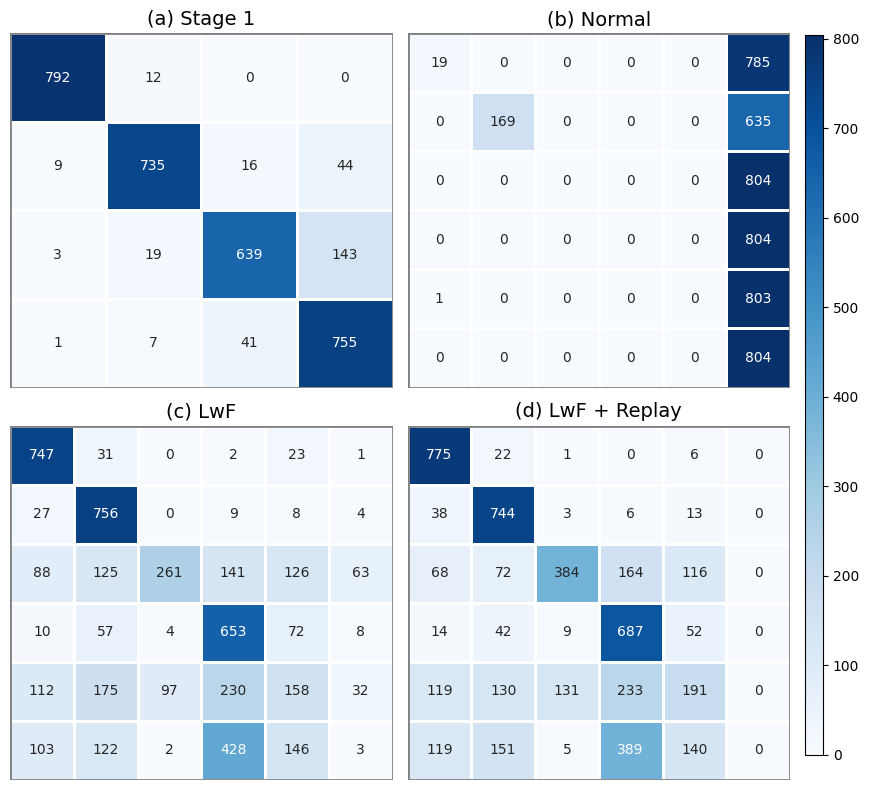

In [111]:
matrices = [(fig_matrix[0], "(a)"), (fig_matrix[1], "(b)"), (fig_matrix[2], "(c)"), (fig_matrix[3], "(d)")]

# Create a figure
fig, axes = plt.subplots(2, 2, figsize=(9,8))

# Find the range for the color bar
vmin = min(matrix.min() for matrix, _ in matrices)
vmax = max(matrix.max() for matrix, _ in matrices)
titles = ['Stage 1', 'Normal', 'LwF', 'LwF + Replay']
# Plot each matrix
for idx, (matrix, caption) in enumerate(matrices):
    ax = axes[idx // 2, idx % 2]
    sns.heatmap(
        matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,  # Disable individual color bars
        vmin=vmin,
        vmax=vmax,
        ax=ax,
        linewidth=2,
    )
    ax.set_title(f"{caption} {titles[idx]}", fontsize=14)
    ax.xaxis.set_visible(False)  # Remove x-axis (labels and ticks)
    ax.yaxis.set_visible(False)  # Remove x-axis (labels and ticks)
    rect = Rectangle(
        (0, 0),  # Lower-left corner of the heatmap
        matrix.shape[1],  # Width of the rectangle
        matrix.shape[0],  # Height of the rectangle
        linewidth=2,
        edgecolor='grey',
        facecolor='none',
        transform=ax.transData  # Align to the data coordinates
    )
    ax.add_patch(rect)


# Add a shared color bar
cbar_ax = fig.add_axes([0.9, 0.05, 0.02, 0.9])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm, cax=cbar_ax)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the color bar
plt.show()

In [17]:
import numpy as np
from sklearn.metrics import f1_score

# Confusion matrix
conf_matrix = np.array([
    [791, 13, 0, 0, 0, 0],
    [46, 754, 1, 1, 1, 1],
    [26, 123, 452, 39, 71, 93],
    [9, 137, 84, 408, 35, 131],
    [26, 154, 52, 33, 469, 70],
    [27, 275, 16, 201, 104, 181]
])

# Compute F1 score for each class
f1_scores = []
for i in range(conf_matrix.shape[0]):
    tp = conf_matrix[i, i]  # True positive
    fp = np.sum(conf_matrix[:, i]) - tp  # False positive
    fn = np.sum(conf_matrix[i, :]) - tp  # False negative
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    f1_scores.append(f1)

# Print F1 score for each class
for i, f1 in enumerate(f1_scores):
    print(f'F1 score for class {i}: {f1:.4f}')

# Compute macro F1 score
macro_f1 = np.mean(f1_scores)
print(f'Macro F1 score: {macro_f1:.4f}')


F1 score for class 0: 0.9150
F1 score for class 1: 0.6673
F1 score for class 2: 0.6416
F1 score for class 3: 0.5491
F1 score for class 4: 0.6321
F1 score for class 5: 0.2828
Macro F1 score: 0.6146
